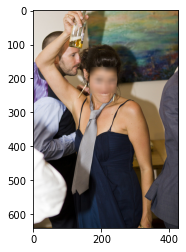

In [10]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
import os 
import glob 
import cv2
from PIL import Image, ImageFilter


raw_img = r"" # Path for the images to be blurred
raw_path = os.path.join(raw_img,'*g') 
raw = glob.glob(raw_path) 

# Function to blur images
def blur(image):
    blr = image.filter(ImageFilter.BoxBlur(9))
    #pyplot.imshow(blr)
    return blr

# Function to crop the images
def image_crop(x, y, w, height,img):
    im1 = img.crop((x,y,x+w,y+w)) 
    #pyplot.imshow(im1)
    return im1

# Function to get the final blurred image
def get_final_image(blr_image,original_img,x,y):
    original_img.paste(blr_image, (x, y))
    #image = original_img
    return original_img

i = 0
for f1 in raw: 
    # load images from filepath
    img_np = cv2.imread(f1)
    img_im = Image.open(f1)
    # Create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(img_np)
    for f in faces:
        # get coordinates
        x, y, width, height = f['box']
        # Call the function to crop the images
        crp = image_crop(x, y, width, height,img_im)
        # Call the function to blur the images
        blr_image = blur(crp)
        # Get the final image by pasting the blurred facial image on the original one
        final_image = get_final_image(blr_image,img_im,x,y)
        # Save the final images to the path given below
        path = r'C:\blurred images\blur'+str(i)+'.jpg' # Path to save blurred images
        final_image.save(path)
        pyplot.imshow(final_image)
        i += 1